# Análisis de las precipitaciones de Barcelona

### Carga de librerías

In [128]:
# General
import pandas as pd
import numpy as np
import datetime

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# MySQL
import mysql.connector as msql
from mysql.connector import Error

# Web Scraping
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# Preprocesado
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# PCA y clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Métricas
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import svm
import xgboost as xgb

# kneed
from kneed import KneeLocator

# warnings
import warnings
warnings.filterwarnings("ignore") 

## Obtención de los datos

In [2]:
# Página principal
url2 = 'https://datosclima.es/Aemet2013/Tempestad2013.php'

In [3]:
# Se crea una instancia para el navegador de Chrome
repositori =
driver = webdriver.Chrome(repositori)

# Se accede a la página web desde el webdriver
driver.get(url2)

### Precipitaciones

In [4]:
# Se crea un objeto que contiene toda la información de las tablas de interés
table3 = driver.find_elements_by_xpath('//*[@width="800"]')

In [6]:
# Se obtienen los datos y se almacenan
tablas_1 = []
for i in table3:
    tablas_1.append(pd.read_html(i.get_attribute('outerHTML')))

In [9]:
# Para cada segmento, se extraen las tres tablas por año que estaban separadas y se juntan
df_pre = pd.DataFrame()
for i in range(len(tablas_1)):
    df_pre = df_pre.append(tablas_1[i][1])
    df_pre = df_pre.append(tablas_1[i][2])
    df_pre = df_pre.append(tablas_1[i][3])   

In [10]:
# Se cambia el nombre de las columnas, se elimiman los encabezados y se resetea el índice
df_pre = df_pre.rename(columns={0:'Fecha',1:'l/m2'})
df_pre = df_pre[df_pre['l/m2']!='Precipitación: l/m2']
df_pre = df_pre.reset_index(drop=True)

In [11]:
# Aspecto del dataframe
df_pre

,Fecha,l/m2
0,07-05-2013,0
1,08-05-2013,0
2,09-05-2013,0
3,10-05-2013,0.7
4,11-05-2013,0.3
...,...,...
2932,26-06-2021,0
2933,27-06-2021,0
2934,28-06-2021,0
2935,29-06-2021,NaN


In [12]:
# MySQL no acepta valores NaN, así que se sustituyen por None
df_pre = df_pre.where((pd.notnull(df_pre)), None)

### Temperaturas

In [13]:
# Se crea un objeto que contiene toda la información de las tablas de interés
table3 = driver.find_elements_by_xpath('//*[@width="800"]')

In [14]:
tablas_2 = []

In [15]:
for i in table3:
    tablas_2.append(pd.read_html(i.get_attribute('outerHTML')))

In [16]:
df_temp = pd.DataFrame()

In [17]:
for i in range(len(tablas_2)):
    df_temp = df_temp.append(tablas_2[i][1])
    df_temp = df_temp.append(tablas_2[i][2])
    df_temp = df_temp.append(tablas_2[i][3])

In [18]:
df_temp

,0,1,2
0,FECHA,T. Máxima,T.Mínima
1,07-05-2013,20.5,14.9
2,08-05-2013,21.9,16.1
3,09-05-2013,20.9,17.0
4,10-05-2013,18.9,16.0
...,...,...,...
56,26-06-2021,25.2,20.3
57,27-06-2021,25.9,20.8
58,28-06-2021,25.9,20.3
59,29-06-2021,25.2,21.5


In [19]:
df_temp = df_temp.rename(columns={0:'Fecha',1:'T.Máxima',2:'T.Mínima'})
df_temp = df_temp[df_temp['Fecha']!='FECHA']
df_temp = df_temp.reset_index(drop=True)

In [20]:
df_temp

,Fecha,T.Máxima,T.Mínima
0,07-05-2013,20.5,14.9
1,08-05-2013,21.9,16.1
2,09-05-2013,20.9,17.0
3,10-05-2013,18.9,16.0
4,11-05-2013,19.0,15.7
...,...,...,...
2932,26-06-2021,25.2,20.3
2933,27-06-2021,25.9,20.8
2934,28-06-2021,25.9,20.3
2935,29-06-2021,25.2,21.5


In [21]:
df_temp = df_temp.where((pd.notnull(df_temp)), None)

### Vientos

In [22]:
# Se crea un objeto que contiene toda la información de las tablas de interés
table3 = driver.find_elements_by_xpath('//*[@width="800"]')

In [23]:
tablas_3 = []

In [24]:
for i in table3:
    tablas_3.append(pd.read_html(i.get_attribute('outerHTML')))

In [25]:
df_viento = pd.DataFrame()

In [26]:
for i in range(len(tablas_3)):
    df_viento = df_viento.append(tablas_3[i][1])
    df_viento = df_viento.append(tablas_3[i][2])
    df_viento = df_viento.append(tablas_3[i][3])

In [27]:
df_viento = df_viento.rename(columns={0:'Fecha',1:'Racha Max (Km/h)',2:'Hora Racha',3: 'V. Media Max (Km/h)'})
df_viento = df_viento[df_viento['Fecha']!='FECHA']
df_viento = df_viento.reset_index(drop=True)

In [28]:
df_viento

,Fecha,Racha Max (Km/h),Hora Racha,V. Media Max (Km/h)
0,07-05-2013,24,11:30,17
1,08-05-2013,23,21:50,17
2,09-05-2013,21,23:40,14
3,10-05-2013,35,12:00,28
4,11-05-2013,30,12:40,25
...,...,...,...,...
2932,26-06-2021,36,14:30,31
2933,27-06-2021,24,12:50,18
2934,28-06-2021,32,22:00,29
2935,29-06-2021,30,00:20,26


In [29]:
df_viento = df_viento.where((pd.notnull(df_viento)), None)

In [30]:
# Se cierra el driver
driver.close()

## Exportación a MySQL

### Precipitaciones

In [ ]:
db =
user = 
password =

In [31]:
try:
    # Se crea un objeto que permite la conexión con MySQL
    conn = msql.connect(host='localhost', 
                        database=db, 
                        user=user, 
                        password=password
                       )
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        
        # Se inserta fila por fila en la tabla de la base de datos
        for i,row in df_pre.iterrows():
            sql = "INSERT INTO tiempo_barcelona.precipitaciones VALUES (%s,%s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not autocommitted by default, so we 
            # must commit to save our changes
            conn.commit()
except Error as e:
    print("Error while connecting to MySQL", e)

You're connected to database:  ('tiempo_barcelona',)
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Rec

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

### Temperaturas

In [32]:
try:
    conn = msql.connect(host='localhost', 
                        database=db, 
                        user=user, 
                        password=password
                       )
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

        for i,row in df_temp.iterrows():
            sql = "INSERT INTO tiempo_barcelona.temperaturas VALUES (%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not autocommitted by default, so we 
            # must commit to save our changes
            conn.commit()
except Error as e:
    print("Error while connecting to MySQL", e)

You're connected to database:  ('tiempo_barcelona',)
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Rec

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

### Viento

In [33]:
try:
    conn = msql.connect(host='localhost', 
                        database=db, 
                        user=user, 
                        password=password
                       )
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

        for i,row in df_viento.iterrows():
            sql = "INSERT INTO tiempo_barcelona.vientos VALUES (%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not autocommitted by default, so we 
            # must commit to save our changes
            conn.commit()
except Error as e:
    print("Error while connecting to MySQL", e)

You're connected to database:  ('tiempo_barcelona',)
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Rec

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

## Lectura de datos

In [2]:
# Se crea un objeto que permite la conexión con MySQL
mydb = msql.connect(host='localhost', 
                    database=db, 
                    user=user, 
                    password=password
                    )

In [3]:
# Objeto que permite crear querys, mostrar tablas, etc.
mycursor = mydb.cursor()

In [4]:
# Tablas que forman parte de la base de datos
mycursor.execute("SHOW TABLES")

for x in mycursor:
    print(x)

('precipitaciones',)
('temperaturas',)
('vientos',)


### Precipitaciones

In [5]:
# Se selecciona todos los registros de la tabla
mycursor.execute("SELECT * FROM precipitaciones")

prec = mycursor.fetchall()

# Nombre de los atributos
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]

# Creación del dataframe
df_p = pd.DataFrame(prec,columns=field_names)
df_p.head()

,Fecha,l/m2
0,07-05-2013,0
1,08-05-2013,0
2,09-05-2013,0
3,10-05-2013,0.7
4,11-05-2013,0.3


### Temperaturas

In [6]:
# Se selecciona todos los registros de la tabla
mycursor.execute("SELECT * FROM temperaturas")

temp = mycursor.fetchall()

# Nombre de los atributos
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]

# Creación del dataframe
df_t = pd.DataFrame(temp,columns=field_names)
df_t.head()

,Fecha,T.Máxima,T.Mínima
0,07-05-2013,20.5,14.9
1,08-05-2013,21.9,16.1
2,09-05-2013,20.9,17.0
3,10-05-2013,18.9,16.0
4,11-05-2013,19.0,15.7


### Vientos 

In [7]:
# Se selecciona todos los registros de la tabla
mycursor.execute("SELECT * FROM vientos")

vientos = mycursor.fetchall()

# Nombre de los atributos
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]

# Creación del dataframe
df_v = pd.DataFrame(vientos,columns=field_names)
df_v.head()

,Fecha,Racha Max (Km/h),Hora Racha,V Media Max (Km/h)
0,07-05-2013,24,11:30,17
1,08-05-2013,23,21:50,17
2,09-05-2013,21,23:40,14
3,10-05-2013,35,12:00,28
4,11-05-2013,30,12:40,25


## Cambio de formatos

In [8]:
pre_df = df_p.copy()
temp_df = df_t.copy()
vientos_df = df_v.copy()

### Formato datetime

In [9]:
pre_df['Fecha'] = pd.to_datetime(pre_df['Fecha'],format='%d-%m-%Y')
temp_df['Fecha'] = pd.to_datetime(temp_df['Fecha'],format='%d-%m-%Y')
vientos_df['Fecha'] = pd.to_datetime(vientos_df['Fecha'],format='%d-%m-%Y')

### Formato númerico

In [10]:
pre_df['l/m2'] = pre_df['l/m2'].astype(float)

temp_df['T.Máxima'] = temp_df['T.Máxima'].astype(float)
temp_df['T.Mínima'] = temp_df['T.Mínima'].astype(float)

vientos_df['Racha Max (Km/h)'] = vientos_df['Racha Max (Km/h)'].astype(float)
vientos_df['V Media Max (Km/h)'] = vientos_df['V Media Max (Km/h)'].astype(float)

## Imputación de datos numéricos

### Precipitaciones

In [11]:
# Imputación de datos numéricos por la media
atributos = ['l/m2']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
pre_df[atributos] = imp.fit_transform(pre_df[atributos].values)
pre_df[atributos] = round(pre_df[atributos],2)

### Temperaturas

In [12]:
# Imputación de datos numéricos por la media
atributos = ['T.Máxima','T.Mínima']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
temp_df[atributos] = imp.fit_transform(temp_df[atributos].values)
temp_df[atributos] = round(temp_df[atributos],2)

### Vientos

In [13]:
# Imputación de datos numéricos por la media
atributos = ['Racha Max (Km/h)','V Media Max (Km/h)']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
vientos_df[atributos] = imp.fit_transform(vientos_df[atributos].values)
vientos_df[atributos] = round(vientos_df[atributos],2)

## Análisis exploratorio

### Precipitaciones

In [14]:
# Descriptivo general
pre_df.describe()

,l/m2
count,2937.000000
mean,1.276643
std,5.635811
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,85.900000


<span style='color:blue'> En la gran mayoría de días (más del 75%) no cayó precipitación, es decir, que no llovió </span>

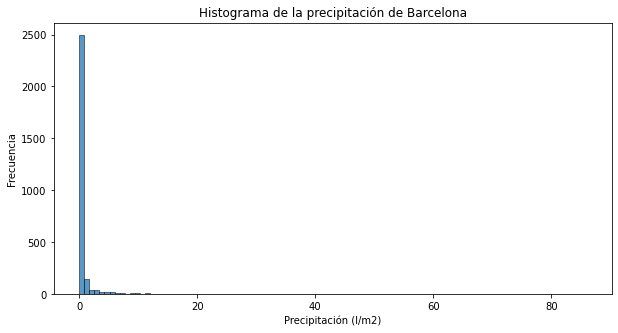

In [34]:
# Histograma general
fig = plt.figure(figsize=(10,5))
sns.histplot(pre_df['l/m2'],bins=100)
plt.title("Histograma de la precipitación de Barcelona")
plt.xlabel("Precipitación (l/m2)")
plt.ylabel("Frecuencia")
#plt.legend(title='Tipo', bbox_to_anchor=(1.30, 1), loc='upper left')
plt.show()

<span style='color:blue'> Según el histograma, la distribución de las precipitaciones no se parece a una distribución gaussiana. Más bien parece exponencial. </span>

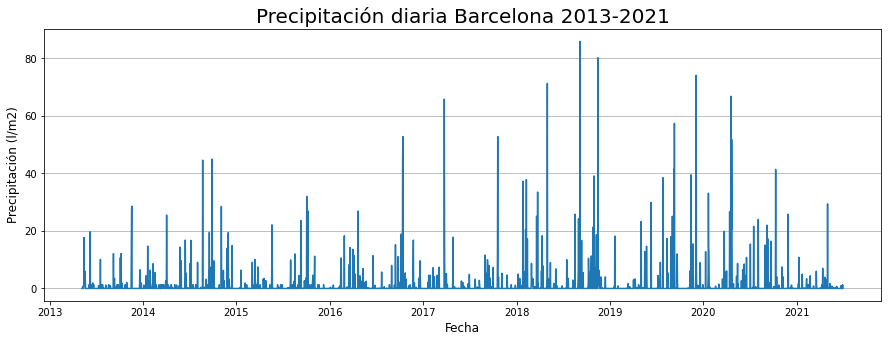

In [15]:
# Gráfico de serie temporal de precipitaciones
sns.lineplot(x="Fecha", y="l/m2", data=pre_df)

plt.title('Precipitación diaria Barcelona 2013-2021', fontsize=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precipitación (l/m2)', fontsize=12)
plt.grid(axis='y')
plt.gcf().set_size_inches(15, 5);

<span style='color:blue'> A primera vista se aprecia una cierta estacionalidad en las precipitaciones: suele llover más en época de otoño-invierno. Parece ser que 2018 fue el año que más cantidad de precipitación acumuló.</span>

In [16]:
pre_df[2330:2340]

,Fecha,l/m2
2330,2019-09-28,0.0
2331,2019-09-29,0.0
2332,2019-09-30,0.0
2333,2019-11-01,0.0
2334,2019-11-02,0.0
2335,2019-11-03,0.2
2336,2019-11-04,0.0
2337,2019-11-05,0.0
2338,2019-11-06,0.0
2339,2019-11-07,0.0


<span style='color:blue'> No hay datos de octubre de 2019 </span>

In [17]:
# Registro con el valor máximo de precipitación
pre_df[pre_df['l/m2']==max(pre_df['l/m2'])]

,Fecha,l/m2
1943,2018-09-06,85.9


<span style='color:blue'> El día 6 de septiembre de 2018 cayó una de las precipitaciones más intensas de los últimos años: 85.9 litros por metro cuadrado. </span>

In [14]:
pre_df_2 = pre_df.copy()

In [15]:
# Se crea la variable año
pre_df_2['Año'] = pre_df_2['Fecha'].dt.year

In [16]:
# Se crea la variable trimestre
pre_df_2['Trimestre'] = np.where(pre_df_2['Fecha'].dt.month.isin([1,2,3]), 'T1',
                               np.where(pre_df_2['Fecha'].dt.month.isin([4,5,6]), 'T2', 
                                        np.where(pre_df_2['Fecha'].dt.month.isin([7,8,9]), 'T3', 'T4')))

#### Precipitación por año

In [21]:
# Media de precipitación por año
pre_año = (pre_df_2.groupby('Año')['l/m2'].mean()).to_frame().reset_index()

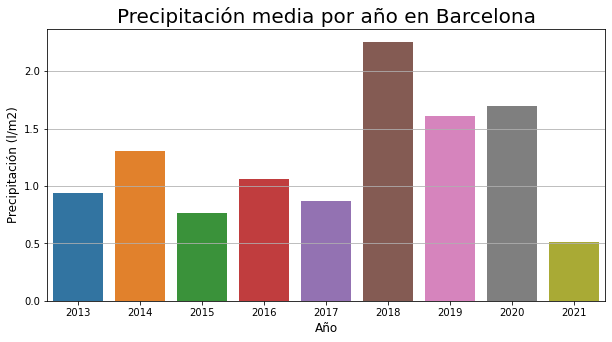

In [22]:
# Gráfico de barras
fig= plt.figure(figsize=(10, 5))

sns.barplot(x="Año", y="l/m2", data=pre_año)

plt.title('Precipitación media por año en Barcelona', fontsize=20)
plt.ylabel('Precipitación (l/m2)', fontsize=12)
plt.xlabel('Año', fontsize=12);
plt.grid(axis='y')
plt.show()

<span style='color:blue'> El año 2018 fue el que más cantidad de precipitación cayó, seguido de 2020 y 2019. El año más seco fue 2015 (no hay que tener en cuenta ni 2013 ni 2021 porque no están completos). </span>

#### Precipitación por trimestre

In [23]:
# Media de precipitación por trimestre
pre_trim = (pre_df_2.groupby('Trimestre')['l/m2'].mean()).to_frame().reset_index()

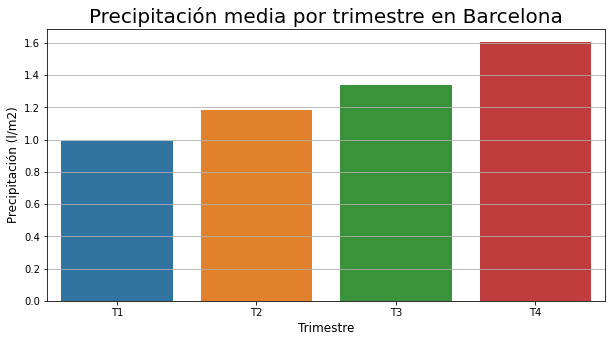

In [24]:
# Gráfico de barras
fig= plt.figure(figsize=(10, 5))

sns.barplot(x="Trimestre", y="l/m2", data=pre_trim)

plt.title('Precipitación media por trimestre en Barcelona', fontsize=20)
plt.ylabel('Precipitación (l/m2)', fontsize=12)
plt.xlabel('Trimestre', fontsize=12);
plt.grid(axis='y')
plt.show()

<span style='color:blue'> En general, los meses de octubre, noviembre y diciembre son más lluviosos, y los de enero, febrero y marzo los más secos. </span>

### Temperatura

In [17]:
# Creación de la variable temperatura media (temperatura máxima + temperatura mínima / 2)
temp_df['T_Media'] = (temp_df['T.Máxima']+temp_df['T.Mínima'])/2
temp_df

,Fecha,T.Máxima,T.Mínima,T_Media
0,2013-05-07,20.5,14.9,17.70
1,2013-05-08,21.9,16.1,19.00
2,2013-05-09,20.9,17.0,18.95
3,2013-05-10,18.9,16.0,17.45
4,2013-05-11,19.0,15.7,17.35
...,...,...,...,...
2932,2021-06-26,25.2,20.3,22.75
2933,2021-06-27,25.9,20.8,23.35
2934,2021-06-28,25.9,20.3,23.10
2935,2021-06-29,25.2,21.5,23.35


In [57]:
# Descriptivo general
temp_df.describe().round(2)

,T.Máxima,T.Mínima,T_Media
count,2937.00,2937.00,2937.00
mean,20.76,14.84,17.80
std,5.15,5.60,5.31
min,4.60,0.10,2.70
25%,16.40,10.20,13.30
50%,20.76,14.70,17.60
75%,25.20,19.70,22.40
max,35.20,27.10,30.10


<span style='color:blue'> La temperatura media diaria en Barcelona es de unos 17.8 grados centígrados </span>

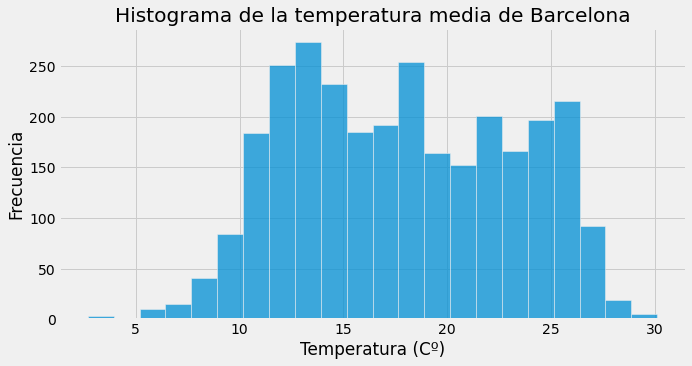

In [55]:
# Histograma general
fig = plt.figure(figsize=(10,5))
sns.histplot(temp_df['T_Media'])
plt.title("Histograma de la temperatura media de Barcelona")
plt.xlabel("Temperatura (Cº)")
plt.ylabel("Frecuencia")
#plt.legend(title='Tipo', bbox_to_anchor=(1.30, 1), loc='upper left')
plt.show()

<span style='color:blue'> La distribución se parece a la de Gauss por su forma de campana. </span>

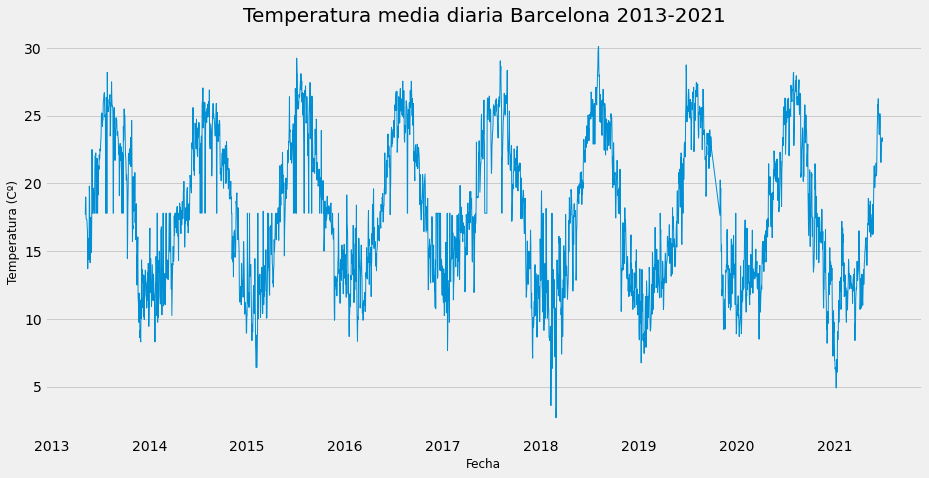

In [71]:
# Gráfico de serie temporal
sns.lineplot(x='Fecha', y='T_Media', data=temp_df, linewidth = 1)

plt.title('Temperatura media diaria Barcelona 2013-2021', fontsize=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Temperatura (Cº)', fontsize=12)
plt.grid(axis='x')
plt.gcf().set_size_inches(14, 7);
plt.show()

In [66]:
temp_df[2330:2340]

,Fecha,T.Máxima,T.Mínima,T_Media
2330,2019-09-28,25.4,21.5,23.45
2331,2019-09-29,26.8,19.4,23.10
2332,2019-09-30,25.1,20.1,22.60
2333,2019-11-01,21.0,14.3,17.65
2334,2019-11-02,24.3,16.2,20.25
2335,2019-11-03,21.1,16.5,18.80
2336,2019-11-04,23.6,15.7,19.65
2337,2019-11-05,19.0,13.0,16.00
2338,2019-11-06,19.2,10.7,14.95
2339,2019-11-07,18.4,12.5,15.45


<span style='color:blue'> No hay datos de octubre de 2019 </span>

In [62]:
# Temperatura máxima histórica
temp_df[temp_df['T.Máxima']==max(temp_df['T.Máxima'])]

,Fecha,T.Máxima,T.Mínima
2238,2019-06-28,35.2,22.3


In [64]:
# Temperatura mínima histórica
temp_df[temp_df['T.Mínima']==min(temp_df['T.Mínima'])]

,Fecha,T.Máxima,T.Mínima
1753,2018-02-28,7.3,0.1


### Vientos

In [18]:
# Se elimina 'Hora Racha' porque no interesa
vientos_df = vientos_df.drop('Hora Racha',axis=1)

In [32]:
# Descriptivo general
vientos_df.describe()

,Racha Max (Km/h),V Media Max (Km/h)
count,2937.000000,2937.000000
mean,34.893378,24.382601
std,12.799457,8.275947
min,14.000000,5.000000
25%,26.000000,18.000000
50%,32.000000,23.000000
75%,41.000000,28.000000
max,106.000000,81.000000


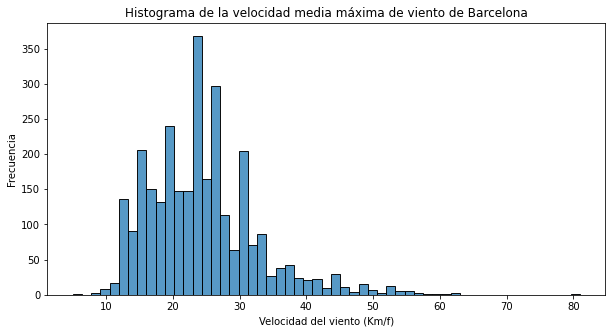

In [41]:
# Histograma general de la velocidad media máxima
fig = plt.figure(figsize=(10,5))
sns.histplot(vientos_df['V Media Max (Km/h)'])
plt.title("Histograma de la velocidad media máxima de viento de Barcelona")
plt.xlabel("Velocidad del viento (Km/f)")
plt.ylabel("Frecuencia")
#plt.legend(title='Tipo', bbox_to_anchor=(1.30, 1), loc='upper left')
plt.show()

<span style='color:blue'> La distribución és asimétrica por la izquierda. No se parece mucho a una distribución gaussiana. </span>

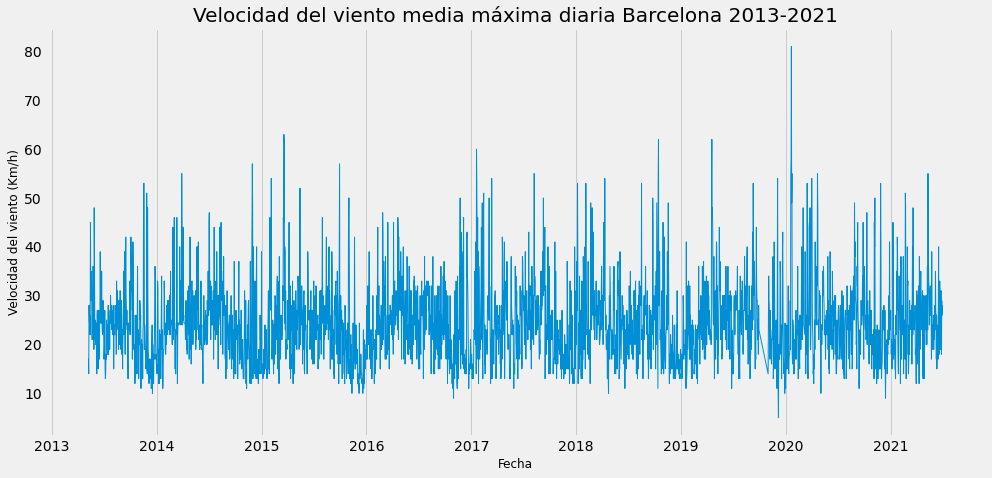

In [72]:
#plt.figure(figsize=(10, 5))
sns.lineplot(x='Fecha', y='V Media Max (Km/h)', data=vientos_df, linewidth = 1)

plt.title('Velocidad del viento media máxima diaria Barcelona 2013-2021', fontsize=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Velocidad del viento (Km/h)', fontsize=12)
plt.grid(axis='y')
plt.gcf().set_size_inches(15, 7);

In [56]:
vientos_df[2330:2340]

,Fecha,Racha Max (Km/h),V Media Max (Km/h)
2330,2019-09-28,22.0,18.0
2331,2019-09-29,46.0,28.0
2332,2019-09-30,27.0,23.0
2333,2019-11-01,21.0,14.0
2334,2019-11-02,37.0,24.0
2335,2019-11-03,64.0,34.0
2336,2019-11-04,51.0,29.0
2337,2019-11-05,60.0,28.0
2338,2019-11-06,42.0,20.0
2339,2019-11-07,31.0,17.0


<span style='color:blue'> No hay datos de octubre de 2019 </span>

In [65]:
# Racha máxima histórica
vientos_df[vientos_df['Racha Max (Km/h)']==max(vientos_df['Racha Max (Km/h)'])]

,Fecha,Racha Max (Km/h),V Media Max (Km/h)
2414,2020-01-21,106.0,81.0


In [66]:
# Velocidad Media máxima histórica
vientos_df[vientos_df['V Media Max (Km/h)']==max(vientos_df['V Media Max (Km/h)'])]

,Fecha,Racha Max (Km/h),V Media Max (Km/h)
2414,2020-01-21,106.0,81.0


## Construcción del dataframe final

In [19]:
# Primero se concatenan los dataframes de precipitaciones y temperaturas
df_final = pd.concat([pre_df_2,temp_df[['T_Media']]],axis=1)
df_final

,Fecha,l/m2,Año,Trimestre,T_Media
0,2013-05-07,0.00,2013,T2,17.70
1,2013-05-08,0.00,2013,T2,19.00
2,2013-05-09,0.00,2013,T2,18.95
3,2013-05-10,0.70,2013,T2,17.45
4,2013-05-11,0.30,2013,T2,17.35
...,...,...,...,...,...
2932,2021-06-26,0.00,2021,T2,22.75
2933,2021-06-27,0.00,2021,T2,23.35
2934,2021-06-28,0.00,2021,T2,23.10
2935,2021-06-29,1.28,2021,T2,23.35


In [20]:
# Luego se concatena con el dataframe de vientos
df_final = pd.concat([df_final,vientos_df['V Media Max (Km/h)']],axis=1)

In [21]:
# Aspecto final del dataframe
df_final

,Fecha,l/m2,Año,Trimestre,T_Media,V Media Max (Km/h)
0,2013-05-07,0.00,2013,T2,17.70,17.0
1,2013-05-08,0.00,2013,T2,19.00,17.0
2,2013-05-09,0.00,2013,T2,18.95,14.0
3,2013-05-10,0.70,2013,T2,17.45,28.0
4,2013-05-11,0.30,2013,T2,17.35,25.0
...,...,...,...,...,...,...
2932,2021-06-26,0.00,2021,T2,22.75,31.0
2933,2021-06-27,0.00,2021,T2,23.35,18.0
2934,2021-06-28,0.00,2021,T2,23.10,29.0
2935,2021-06-29,1.28,2021,T2,23.35,26.0


## Procesado del dato

In [22]:
df_procesado = df_final.drop('Fecha',axis=1)

### Variables numéricas

In [23]:
# Escalado de los datos numéricos: MinMax
atributos = ['l/m2']
scaler = MinMaxScaler()
df_procesado[atributos] = scaler.fit_transform(df_procesado[atributos].values)

In [24]:
# Escalado de los datos numéricos: RobustScaler
atributos = ['T_Media','V Media Max (Km/h)']
scaler = RobustScaler()
df_procesado[atributos] = scaler.fit_transform(df_procesado[atributos].values)

In [25]:
df_procesado.head()

,l/m2,Año,Trimestre,T_Media,V Media Max (Km/h)
0,0.000000,2013,T2,0.010989,-0.6
1,0.000000,2013,T2,0.153846,-0.6
2,0.000000,2013,T2,0.148352,-0.9
3,0.008149,2013,T2,-0.016484,0.5
4,0.003492,2013,T2,-0.027473,0.2


### Variables categóricas

In [26]:
df_procesado['Año'] = df_procesado['Año'].astype(str)

In [27]:
# Codificación binaria mediante get_dummies
atributos = ['Año','Trimestre']
dummies =  pd.get_dummies(df_procesado[atributos])
dummies

,Año_2013,Año_2014,Año_2015,Año_2016,Año_2017,Año_2018,Año_2019,Año_2020,Año_2021,Trimestre_T1,Trimestre_T2,Trimestre_T3,Trimestre_T4
0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,0,0,0,0,0,0,0,0,1,0,1,0,0
2933,0,0,0,0,0,0,0,0,1,0,1,0,0
2934,0,0,0,0,0,0,0,0,1,0,1,0,0
2935,0,0,0,0,0,0,0,0,1,0,1,0,0


In [28]:
procesado_df = df_procesado.join(dummies)
procesado_df = procesado_df.drop(columns=['Año','Trimestre'])
procesado_df.head()

,l/m2,T_Media,V Media Max (Km/h),Año_2013,Año_2014,Año_2015,Año_2016,Año_2017,Año_2018,Año_2019,Año_2020,Año_2021,Trimestre_T1,Trimestre_T2,Trimestre_T3,Trimestre_T4
0,0.000000,0.010989,-0.6,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.000000,0.153846,-0.6,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.148352,-0.9,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.008149,-0.016484,0.5,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.003492,-0.027473,0.2,1,0,0,0,0,0,0,0,0,0,1,0,0


## Análisis no supervisado: PCA y Clustering

### PCA

In [85]:
# Se crea un objeto PCA y se aplica a los datos para obtener las primeras componente principales que expliquen el 80% del dato
pca = PCA(n_components = 0.8, random_state=1234)
principalComponents = pca.fit_transform(procesado_df)

In [86]:
# Distribución del porcentaje de varianza explicada
pca.explained_variance_ratio_.round(3)

array([0.266, 0.198, 0.098, 0.088, 0.047, 0.047, 0.047, 0.046])

In [87]:
# Varianza explicada por las dos primeras componentes
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.4634616352300396

In [88]:
# Dataframe de las primeras dos componentes
pca_df = pd.DataFrame(
     principalComponents[:,:2],
     columns=["CP1", "CP2"],
)

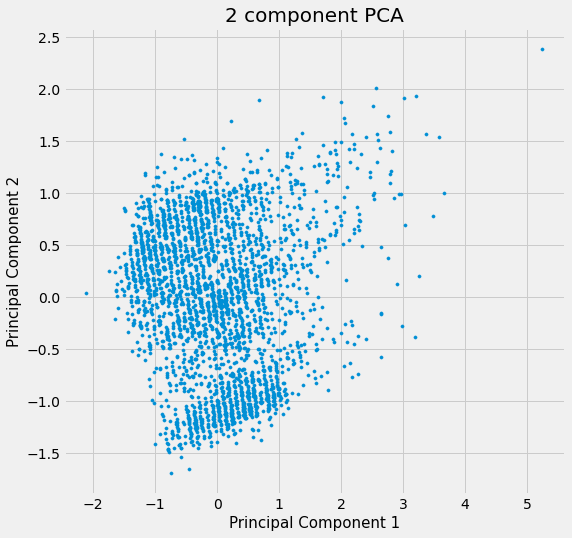

In [89]:
# Visualización del PCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(pca_df['CP1'], pca_df['CP2'], s = 10)
#ax.grid()
plt.show()

### Clustering: K-Means

In [98]:
# PCA con las primeras 8 componentes
pca = PCA(n_components = 0.8, random_state=1234)
principalComponents = pca.fit_transform(procesado_df)

In [99]:
# Parámetross del k-means
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 1234,}

# Lista del las SSE (Suma de los cuadrados de los errores) para cada k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principalComponents)
    sse.append(kmeans.inertia_)

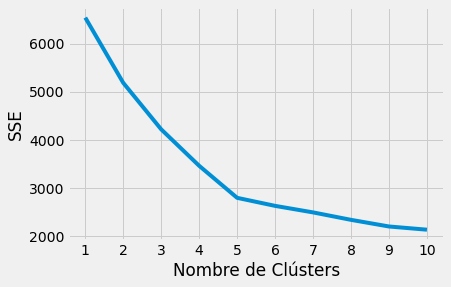

In [100]:
# Representación gráfica
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Nombre de Clústers")
plt.ylabel("SSE")
plt.show()

In [101]:
# Forma automática de escoger K mediante Elbow Method
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print('Numero de clústeres recomendado:', kl.elbow)

Numero de clústeres recomendado: 5


In [102]:
# Se aplica el k-means con 5 clústeres
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 1234,}
kmeans_5 = KMeans(n_clusters=5, **kmeans_kwargs)
pca_kmeans = kmeans_5.fit(principalComponents)

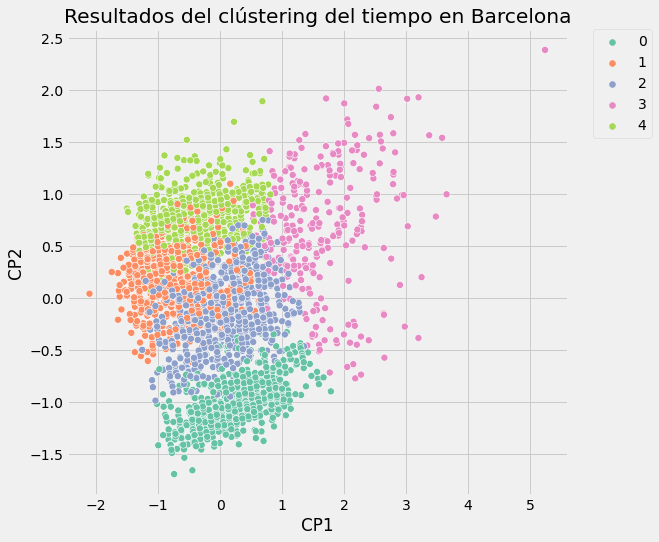

In [103]:
# Representación gráfica: PCA con agrupación
pca_df["cluster"] = pca_kmeans.labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    x="CP1",
    y="CP2",
    s=50,
    data=pca_df,
    hue="cluster",
    palette="Set2",
)

scat.set_title(
    "Resultados del clústering del tiempo en Barcelona"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [104]:
# Se une el dataframe original (antes de procesar) y el dataframe PCA
dfs_2 = df_final.reset_index()
df_clust = dfs_2.join(pca_df)
df_clust = df_clust.drop(columns=['index','CP1','CP2'])
df_clust.head()

,Fecha,l/m2,Año,Trimestre,T_Media,V Media Max (Km/h),cluster
0,2013-05-07,0.0,2013,T2,17.70,17.0,2
1,2013-05-08,0.0,2013,T2,19.00,17.0,2
2,2013-05-09,0.0,2013,T2,18.95,14.0,2
3,2013-05-10,0.7,2013,T2,17.45,28.0,2
4,2013-05-11,0.3,2013,T2,17.35,25.0,2


In [106]:
# Se divide el dataframe en 5, según el clúster asignado
k = df_clust['cluster'].nunique()
df_ad = []
for i in range(k):
     df_ad.append(df_clust[df_clust['cluster']==i])

### Descriptivo de los clústeres

#### Año

In [107]:
idaño = []
var = 'Año'
for i in range(len(df_ad)):
    idaño.append((df_ad[i][var].groupby(df_ad[i][var]).count()/(len(df_ad[i][var]))).reset_index(name='Freq'))

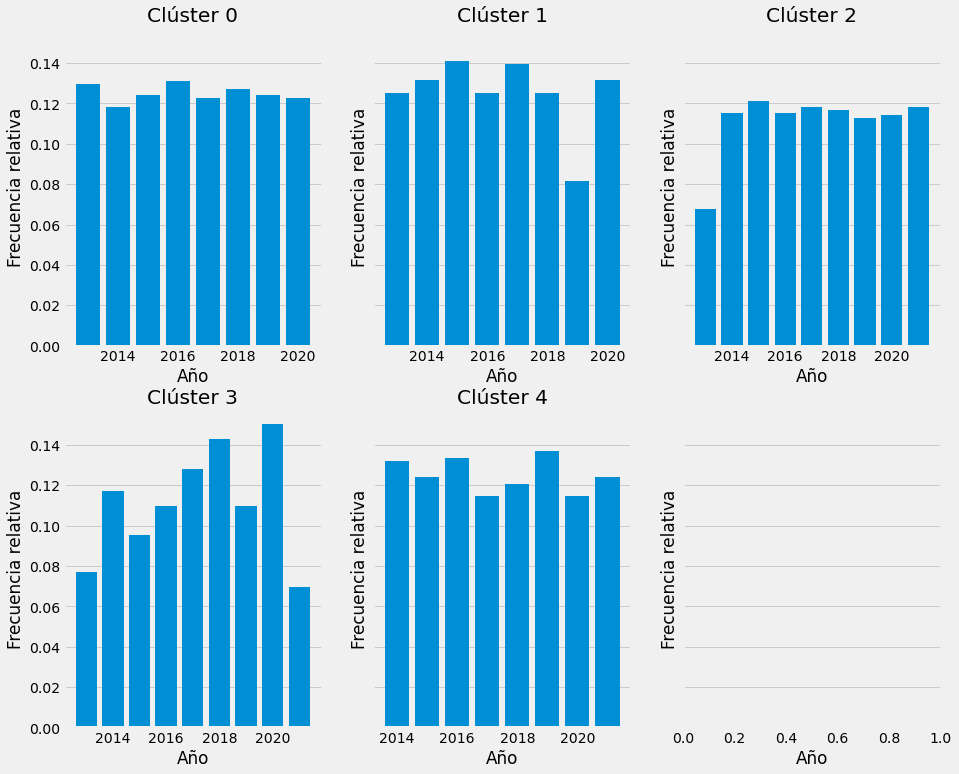

In [113]:
# Barplot de la frecuencia relativa de tipos
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(14,12))
axs[0,0].bar(idaño[0].Año, idaño[0].Freq)
axs[0,0].set_title('Clúster 0')
axs[0,1].bar(idaño[1].Año, idaño[1].Freq)
axs[0,1].set_title('Clúster 1')
axs[0,2].bar(idaño[2].Año, idaño[2].Freq)
axs[0,2].set_title('Clúster 2')
axs[1,0].bar(idaño[3].Año, idaño[3].Freq)
axs[1,0].set_title('Clúster 3')
axs[1,1].bar(idaño[4].Año, idaño[4].Freq)
axs[1,1].set_title('Clúster 4')

for ax in axs.flat:
    ax.grid(axis='x')
    ax.set(xlabel='Año', ylabel='Frecuencia relativa')
    plt.setp(ax.get_xticklabels(),rotation=0)
    #ax.label_outer()

<span style='color:blue'> No queda claro que el clustering se defina por la variable Año </span>

#### Trimestre

In [114]:
idtrim = []
var = 'Trimestre'
for i in range(len(df_ad)):
    idtrim.append((df_ad[i][var].groupby(df_ad[i][var]).count()/(len(df_ad[i][var]))).reset_index(name='Freq'))

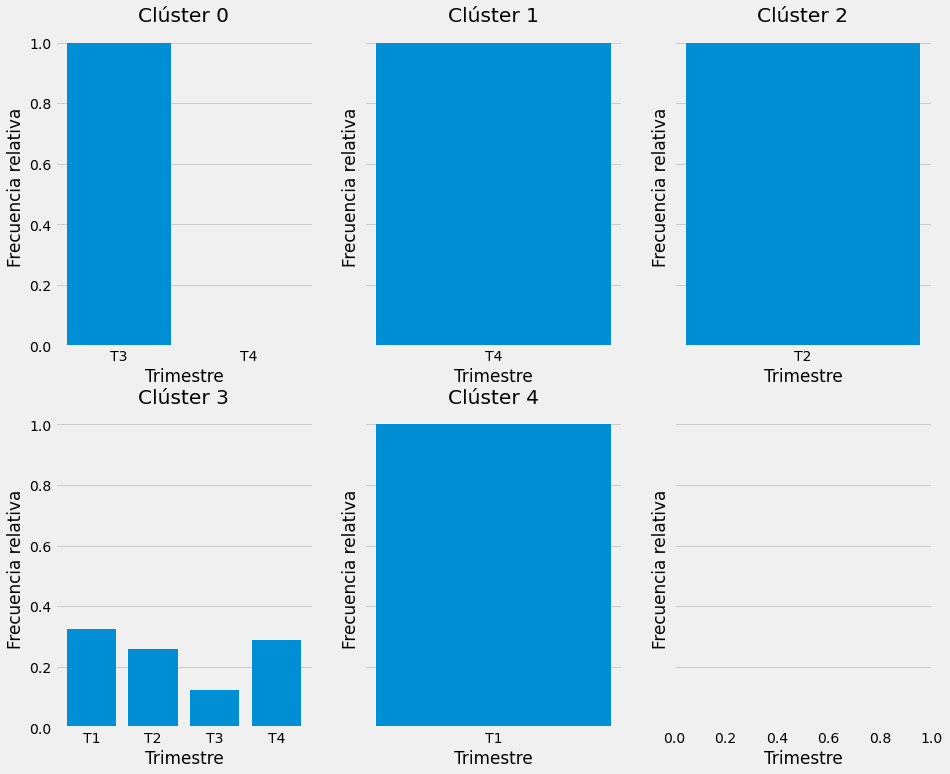

In [116]:
# Barplot de la frecuencia relativa de tipos
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(14,12))
axs[0,0].bar(idtrim[0].Trimestre, idtrim[0].Freq)
axs[0,0].set_title('Clúster 0')
axs[0,1].bar(idtrim[1].Trimestre, idtrim[1].Freq)
axs[0,1].set_title('Clúster 1')
axs[0,2].bar(idtrim[2].Trimestre, idtrim[2].Freq)
axs[0,2].set_title('Clúster 2')
axs[1,0].bar(idtrim[3].Trimestre, idtrim[3].Freq)
axs[1,0].set_title('Clúster 3')
axs[1,1].bar(idtrim[4].Trimestre, idtrim[4].Freq)
axs[1,1].set_title('Clúster 4')

for ax in axs.flat:
    ax.grid(axis='x')
    ax.set(xlabel='Trimestre', ylabel='Frecuencia relativa')
    plt.setp(ax.get_xticklabels(),rotation=0)
    #ax.label_outer()

<span style='color:blue'> La distribución de los trimestres es distinta en los cinco clústeres. </span>

<span style='color:blue'> Clúster 0: Solo aparecen los meses de Julio, Agosto y Septiembre, es decir, época de verano. </span>

<span style='color:blue'> Clúster 1: Solo aparecen los meses de Octubre, Noviembre y Diciembre, es decir, época de otoño. </span>

<span style='color:blue'> Clúster 2: Solo aparecen los meses de Abril, Mayo y Junio, es decir, época de primavera. </span>

<span style='color:blue'> Clúster 4: Solo aparecen los meses de Enero, Febrero y Marzo, es decir, época de invierno. </span>

#### Precipitación

In [117]:
# Media de precipitación clúster
pre_clust = (df_clust.groupby('cluster')['l/m2'].mean()).to_frame().reset_index()

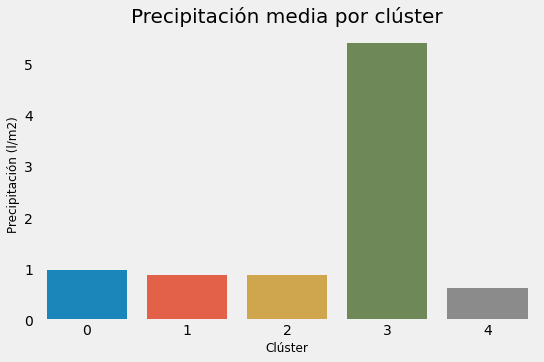

In [118]:
# Gráfico de barras
fig= plt.figure(figsize=(8, 5))

sns.barplot(x="cluster", y="l/m2", data=pre_clust)

plt.title('Precipitación media por clúster', fontsize=20)
plt.ylabel('Precipitación (l/m2)', fontsize=12)
plt.xlabel('Clúster', fontsize=12);
plt.grid(axis='y')
plt.show()

<span style='color:blue'> El clúster 3 tiene de media la mayor cantidad de precipitación </span>

#### Temperatura media

In [119]:
# Media de temperatura por clúster
temp_clust = (df_clust.groupby('cluster')['T_Media'].mean()).to_frame().reset_index()

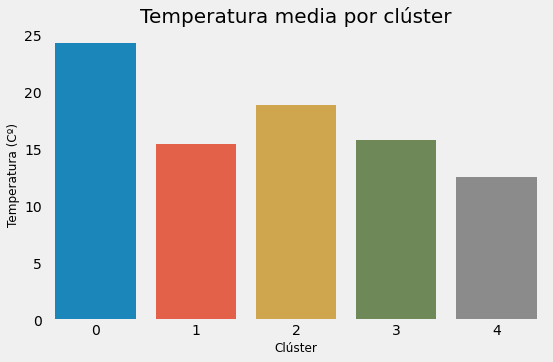

In [121]:
# Gráfico de barras
fig= plt.figure(figsize=(8, 5))

sns.barplot(x="cluster", y="T_Media", data=temp_clust)

plt.title('Temperatura media por clúster', fontsize=20)
plt.ylabel('Temperatura (Cº)', fontsize=12)
plt.xlabel('Clúster', fontsize=12);
plt.grid(axis='y')
plt.show()

<span style='color:blue'> El clúster 0 tiene de media la temperatura más alta y el clúster 4 la más baja.</span>

#### Velocidad de viento media máxima 

In [123]:
# Media de velocidad media máxima por clúster
vientos_clust = (df_clust.groupby('cluster')['V Media Max (Km/h)'].mean()).to_frame().reset_index()

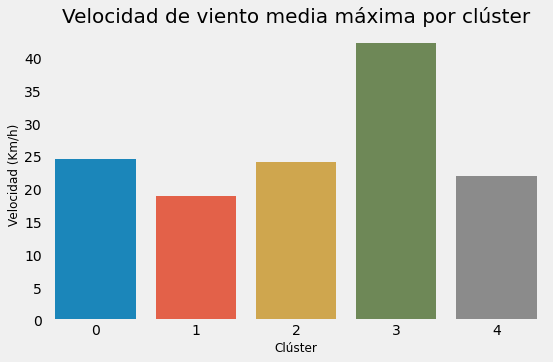

In [124]:
# Gráfico de barras
fig= plt.figure(figsize=(8, 5))

sns.barplot(x="cluster", y="V Media Max (Km/h)", data=vientos_clust)

plt.title('Velocidad de viento media máxima por clúster', fontsize=20)
plt.ylabel('Velocidad (Km/h)', fontsize=12)
plt.xlabel('Clúster', fontsize=12);
plt.grid(axis='y')
plt.show()

<span style='color:blue'> El clúster 3 tiene de media la velocidad de viento más alta y el clúster 1 la más baja.</span>

### Conclusiones del clustering

<span style='color:blue'> El método K-means ha dividido los datos de la siguiente manera: </span>
<li style='color:blue'>Clúster 0 --> Meses de verano con temperaturas altas, poca precipitación y velocidad de viento moderada </li>
<li style='color:blue'>Clúster 1 --> Meses de otoño con temperaturas medio-bajas, poca precipitación y velocidad de viento baja </li>
<li style='color:blue'>Clúster 2 --> Meses de primavera con temperaturas medias, poca precipitación y velocidad de viento moderada </li>
<li style='color:blue'>Clúster 3 --> Mezcla de los cuatro trimestres que recoge las precipitaciones y velocidades de viento más altas </li>
<li style='color:blue'>Clúster 4 --> meses de invierno con las temperaturas más bajas, poca precipitación y velodcidad de viento moderada </li>
<br></br>
<span style='color:blue'> En resumen, el clustering ha dividido los datos según el trimestre y la cantidad de precipitación. </span>

## Análisis supervisado: modelo de clasificación

<span style='color:blue'> El objetivo es crear un modelo de clasificación sencillo para predecir si habrá o no precipitación en base al mes, a la temperatura media y a la velocidad media máxima del viento. Los modelos seleccionados son regresión logística y Random Forest. </span>

In [93]:
df_clas = df_final.copy()

### Variable objetivo

<span style='color:blue'> La variable objetivo es la precipitación, pero está en formato numérico. Se convierte en variable binaria con valor 1 si ese día cayó algo de precipitación y 0 si no cayó nada. </span>

In [94]:
df_clas['objetivo'] = np.where(df_clas['l/m2']>0,1,0)

### Variables independientes

<span style='color:blue'> Se utiliza esta variable par separar las muestra de entrenamiento y prueba, pero se dejará de tener en cuenta para predecir (el modelo solo tiene en cuenta los años con los que ha entrenado).  </span>

<span style='color:blue'> En vez de utilizar Trimestre, se crea la variable Mes. </span>

In [95]:
df_clas['Mes'] = df_clas['Fecha'].apply(lambda x : x.strftime("%B"))

In [96]:
df_clas = df_clas.drop(columns=['Fecha','Trimestre','l/m2'])

In [97]:
df_clas = pd.get_dummies(df_clas,prefix='',prefix_sep='')

In [98]:
df_clas.head()

,Año,T_Media,V Media Max (Km/h),objetivo,April,August,December,February,January,July,June,March,May,November,October,September
0,2013,17.70,17.0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2013,19.00,17.0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2013,18.95,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2013,17.45,28.0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,2013,17.35,25.0,1,0,0,0,0,0,0,0,0,1,0,0,0


### Muestra de prueba y muestra de entrenamiento

<span style='color:blue'> No se tienen en cuenta los registros de los años 2013 y 2021 (porque están incompletos) </span>

In [99]:
train = df_clas[df_clas['Año'].isin([2014,2015,2016,2017,2018,2019])]
test = df_clas[df_clas['Año']==2020]

In [100]:
# Variable objetivo
train_y = train['objetivo']
test_y = test['objetivo']

#Variables independientes
train_X = train.drop(columns=['Año','objetivo'])
test_X = test.drop(columns=['Año','objetivo'])

In [101]:
# Dimensiones de las muestras
print('Muestra de entrenamiento: ', train_X.shape)
print('Muestra de prueba: ', test_X.shape)

Muestra de entrenamiento:  (2156, 14)
Muestra de prueba:  (362, 14)


### Procesado del dato

In [103]:
# Escalado de los datos numéricos: RobustScaler
atributos = ['T_Media','V Media Max (Km/h)']
scaler = RobustScaler()
scaler.fit(train_X[atributos])
train_X[atributos] = scaler.transform(train_X[atributos].values)
test_X[atributos] = scaler.transform(test_X[atributos].values)

In [104]:
train_X.head()

,T_Media,V Media Max (Km/h),April,August,December,February,January,July,June,March,May,November,October,September
238,-0.741667,-0.7,0,0,0,0,1,0,0,0,0,0,0,0
239,-0.297222,-0.9,0,0,0,0,1,0,0,0,0,0,0,0
240,-0.119444,0.1,0,0,0,0,1,0,0,0,0,0,0,0
241,-0.563889,1.0,0,0,0,0,1,0,0,0,0,0,0,0
242,-0.647222,0.8,0,0,0,0,1,0,0,0,0,0,0,0


### Modelo 1: Regresión logística

<span style='color:blue'> Se realiza un Grid Search CV para encontrar los mejores parámetros que mejoren el AUC del modelo (Area bajo la curva ROC) </span>

In [120]:
# Selección del modelo
model_1 = LogisticRegression(random_state=1234)

# Selección de diversos parámetros y valores
tuned_parameters = {
    'solver': ['newton-cg', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2', 'none'],
    'C': [0.5,1.0,1.5],
}

# Selección de la mètrica a optimitzar
#scores = ['precision', 'recall', 'f1']
#scores = ['f1_weighted','f1_micro','f1_macro','accuracy','roc_auc']
score='roc_auc'

print("# Afinación de los hiper-parámetres de %s" % score)
print()
clf_RL = GridSearchCV(estimator = model_1, param_grid = tuned_parameters, cv=10, scoring='%s' % score, n_jobs= -1)
clf_RL.fit(train_X, train_y)
    
print("Mejores parámetros encontrados:")
print()
print(clf_RL.best_params_)

# Afinación de los hiper-parámetres de roc_auc

Mejores parámetros encontrados:

{'C': 0.5, 'penalty': 'l2', 'solver': 'newton-cg'}


<span style='color:blue'> Se crea el modelo en base a los mejores parámetros </span>

In [139]:
# Modelo de regresión logística final
modelo_RL = LogisticRegression(C=0.5, penalty='l2', solver='newton-cg', random_state=1234)
modelo_RL.fit(train_X, train_y)

LogisticRegression(C=0.5, random_state=1234, solver='newton-cg')

### Evaluación del modelo Regresión Logística: muestra de entrenamiento

<span style='color:blue'> Primero se evalua el rendimiento del modelo con la muestra de entrenamiento </span>

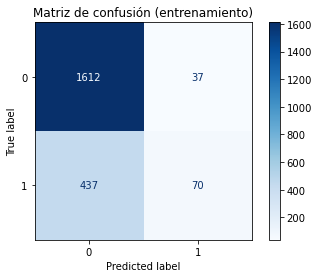

In [144]:
# Matriz de consusión muestra de entrenamiento
titles = "Matriz de confusión (entrenamiento)"

disp = metrics.plot_confusion_matrix(modelo_RL, train_X, train_y,
                                display_labels=['0','1'],
                                cmap=plt.cm.Blues)
disp.ax_.set_title(titles)
plt.show()

In [145]:
# Reporte de clasificación
pred_train_RL = modelo_RL.predict(train_X)
print(classification_report(train_y, pred_train_RL))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1649
           1       0.65      0.14      0.23       507

    accuracy                           0.78      2156
   macro avg       0.72      0.56      0.55      2156
weighted avg       0.76      0.78      0.72      2156



<span style='color:blue'> Se observa que el modelo predice casi todo como 0, de manera que acierta casi todos los valores 0, pero falla mucho con los valores 1 </span>

### Evaluación del modelo Regresión Logística: muestra de prueba

<span style='color:blue'> Ahora se comprueba si el modelo es útil para muestras distintas </span>

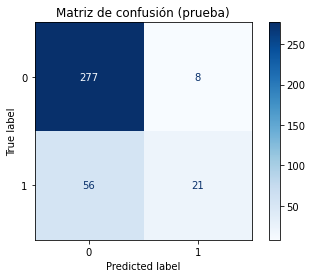

In [146]:
# Matriz de consusión de la muestra de prueba
titles = "Matriz de confusión (prueba)"

disp = metrics.plot_confusion_matrix(modelo_RL, test_X, test_y,
                                display_labels=['0','1'],
                                cmap=plt.cm.Blues)
disp.ax_.set_title(titles)
plt.show()

In [147]:
pred_test_RL = modelo_RL.predict(test_X)
print(classification_report(test_y, pred_test_RL))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       285
           1       0.72      0.27      0.40        77

    accuracy                           0.82       362
   macro avg       0.78      0.62      0.65       362
weighted avg       0.81      0.82      0.79       362



<span style='color:blue'> Parece ser que la precisión y el accuracy han mejorado, pero le cuestaa acertar los valores 1 </span>

### Modelo 2: Random Forest

In [129]:
# Selecció del model
model_2 = RandomForestClassifier(random_state=1234)

# Selecció de diversos paràmetres i valors
tuned_parameters = {
    'n_estimators': [50,100,150],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

# Selecció de la mètrica a optimitzar
#scores = ['precision', 'recall', 'f1']
#scores = ['f1_weighted','f1_micro','f1_macro','accuracy','roc_auc']
score='roc_auc'

print("# Afinació dels hiper-paràmetres de %s" % score)
print()
clf_RFC = GridSearchCV(estimator = model_2, param_grid = tuned_parameters, cv=10, scoring='%s' % score, n_jobs= -1)
clf_RFC.fit(train_X, train_y)
    
print("Millors paràmetres trobats:")
print()
print(clf_RFC.best_params_)

# Afinació dels hiper-paràmetres de roc_auc

Millors paràmetres trobats:

{'class_weight': None, 'criterion': 'entropy', 'max_features': None, 'n_estimators': 150}


In [148]:
# Modelo Random Forest final
modelo_RFC = RandomForestClassifier(class_weight = None, criterion = 'entropy', max_features = None, n_estimators = 150, random_state=1234)
modelo_RFC.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=150,
                       random_state=1234)

### Evaluación del modelo Random Forest: muestra de entrenamiento

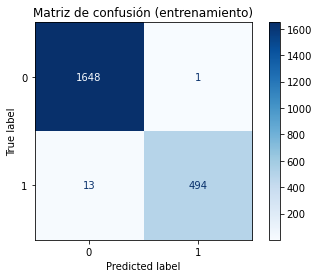

In [149]:
# Matriz de consusión de entrenamiento
titles = "Matriz de confusión (entrenamiento)"

disp = metrics.plot_confusion_matrix(modelo_RFC, train_X, train_y,
                                display_labels=['0','1'],
                                cmap=plt.cm.Blues)
disp.ax_.set_title(titles)
plt.show()

In [131]:
pred_train_RFC = modelo_RFC.predict(train_X)
print(classification_report(train_y, pred_train_RFC))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1649
           1       1.00      0.97      0.99       507

    accuracy                           0.99      2156
   macro avg       1.00      0.99      0.99      2156
weighted avg       0.99      0.99      0.99      2156



<span style='color:blue'> Para la muestra de entrenamiento, el modelo predice de maravilla, pues de 2156 casos solo ha fallado 14. Queda comprobar si para otras muestras estos valores se mantienen. </span>

### Evaluación del modelo Random Forest: muestra de prueba

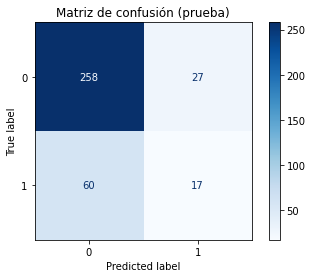

In [150]:
# Matriz de consusión de prueba
titles = "Matriz de confusión (prueba)"

disp = metrics.plot_confusion_matrix(modelo_RFC, test_X, test_y,
                                display_labels=['0','1'],
                                cmap=plt.cm.Blues)
disp.ax_.set_title(titles)
plt.show()

In [151]:
pred_test_RFC = modelo_RFC.predict(test_X)
print(classification_report(test_y, pred_test_RFC))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       285
           1       0.39      0.22      0.28        77

    accuracy                           0.76       362
   macro avg       0.60      0.56      0.57       362
weighted avg       0.72      0.76      0.73       362



<span style='color:blue'> Como era de esperar, el modelo no precide tan bien con datos externos. El modelo Random Forest parece que clasifica peor que el de Regresión Logística. </span>

## Conclusiones

<span style='color:blue'> Al tratarse de una serie temporal con variables se hace difícil crear modelos predictivos de clasificación porque hace falta tener en cuenta otros factores, como la estacionalidad, la tendencia, el ciclo, el ruido, etc. Para un mejor análisis, se debe realizar metodologías de series temporales como, por ejemplo, prepocesado de series temporales y modelos como el ARIMA (Modelo autorregresivo integrado de media móvil). </span>

## Análisis de serie temporal

<span style='color:blue'> Este tipo de análisis se basa en estudiar las cuatro componentes que forman una serie temporal: Estacionariedad, Tendencia, Ciclo y Ruido. </span>

<span style='color:blue'> Por falta de tiempo y conocimiento sobre el tema, solo se realizar un par de métodos y gráficos. No hay conclusiones al respecto. </span>

In [152]:
# Carga de librerías
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [165]:
series_df = df_final.copy()

In [153]:
df_serie = pd.DataFrame({'data': np.array(series_df['l/m2'])}, index=series_df['Fecha'])

In [154]:
# Descomposición aditiva 
result_add = seasonal_decompose(df_serie, model='additive', extrapolate_trend='freq',period=1)

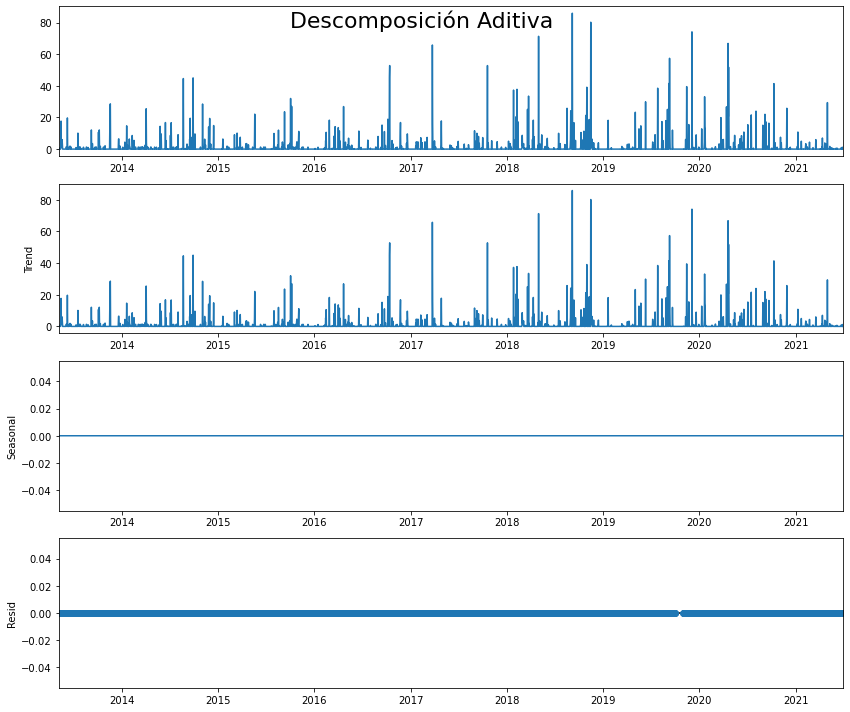

In [156]:
# Plot
plt.rcParams.update({'figure.figsize': (12,10)})
result_add.plot().suptitle('Descomposición Aditiva', fontsize=22)
plt.show()

### Modelo ARIMA

In [158]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

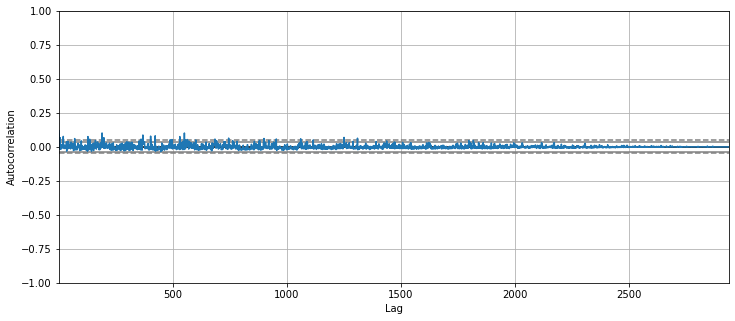

In [160]:
fig= plt.figure(figsize=(12, 5))
autocorrelation_plot(df_serie)
plt.show()

### Muestra de entrenamiento y muestra de prueba

In [172]:
train_series = series_df[series_df['Año']!=2021]
train_series = pd.DataFrame({'data': np.array(train_series['l/m2'])}, index=train_series['Fecha'])

In [174]:
test_series = series_df[series_df['Año']==2021]
test_series = pd.DataFrame({'data': np.array(test_series['l/m2'])}, index=test_series['Fecha'])

In [180]:
# Ajuste del modelo
model = ARIMA(train_series['data'], order=(1,1,2))
model_fit = model.fit()

C:\Users\DeividK3\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\DeividK3\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\DeividK3\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [181]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                 2756
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -8741.639
Date:                Wed, 28 Jul 2021   AIC                          17491.278
Time:                        13:02:03   BIC                          17514.963
Sample:                             0   HQIC                         17499.834
                               - 2756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9938      0.008   -117.718      0.000      -1.010      -0.977
ma.L1         -0.0071      0.011     -0.665      0.506      -0.028       0.014
ma.L2         -0.9872      0.011    -91.218      0.0

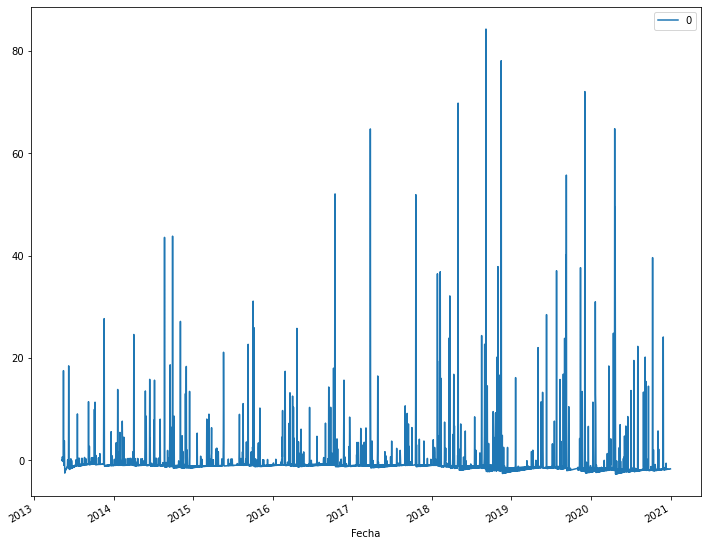

In [184]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

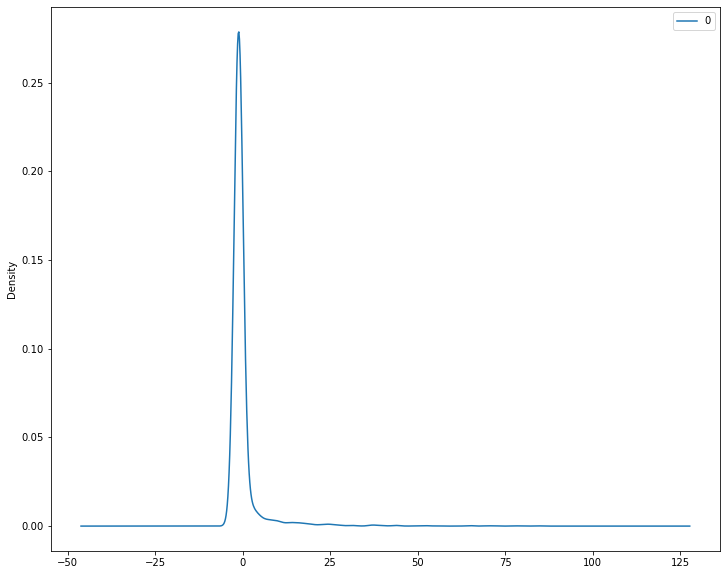

In [185]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [186]:
# summary stats of residuals
print(residuals.describe())

                 0
count  2756.000000
mean      0.085374
std       5.773848
min      -2.683533
25%      -1.393031
50%      -1.017812
75%      -0.828826
max      84.284687
